In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3
from mpld3 import plugins
import numpy as np
import pandas as pd
import datetime as datetime
import mpld3
from mpld3 import utils
from mpld3 import plugins

mpld3.enable_notebook()

In [35]:
df = pd.read_csv('snacks.csv', sep='\t')
df['Date'] = pd.to_datetime(df['Date'])
df['woy'] = df['Date'].apply(lambda x: x.weekofyear)
df['y'] = df['Date'].apply(lambda x: x.year)
df.sort('Ep ID', inplace=True)
df.index = np.arange(df.shape[0])

In [36]:
df.head()

,Ep ID,Date,Food,Approximate calories,woy,y
0,285,2014-04-06,miso soup with pickled ginger,90,14,2014
1,286,2014-04-13,(none reported),0,15,2014
2,287,2014-04-20,chocolate,546,16,2014
3,288,2014-04-27,satay chicken and rice with peanut sauce,944,17,2014
4,289,2014-05-04,greek yogurt with maple syrup,280,18,2014


In [99]:
class BarLabelToolTip(plugins.PluginBase):    
    JAVASCRIPT = """
    mpld3.register_plugin("barlabeltoolTip", BarLabelToolTip);
    BarLabelToolTip.prototype = Object.create(mpld3.Plugin.prototype);
    BarLabelToolTip.prototype.constructor = BarLabelToolTip;
    BarLabelToolTip.prototype.requiredProps = ["id"];
    BarLabelToolTip.prototype.defaultProps = {
        labels: null,
        hoffset: 0,
        voffset: 10,
        location: 'mouse'
    };
    function BarLabelToolTip(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    BarLabelToolTip.prototype.draw = function(){
        var svg = d3.select("#" + this.fig.figid);
        var obj = svg.selectAll(".mpld3-path");

        var labels = this.props.labels;
        var loc = this.props.location;

        this.tooltip = this.fig.canvas.append("text")
            .attr("class", "mpld3-tooltip-text")
            .attr("x", 0)
            .attr("y", 0)
            .text("")
            .style("visibility", "hidden");

        function mouseover(d, i) {
            this.tooltip
                .style("visibility", "visible")
                .text(labels[i]);
        }

        function mousemove(d, i) {
            if (loc === "mouse") {
                var pos = d3.mouse(this.fig.canvas.node())
                this.x = 244;
                this.y = 40;
                //alert(pos);
            }

            this.tooltip
                .attr('x', this.x)
                .attr('y', this.y);
        }

        function mouseout(d, i) {
            this.tooltip.style("visibility", "hidden");
        }

        obj
            .on("mouseover", mouseover.bind(this))
            .on("mousemove", mousemove.bind(this))
            .on("mouseout", mouseout.bind(this));        
    }
    """
    def __init__(self, bar, labels=None, location="mouse"):
        import matplotlib
        from mpld3.utils import get_id

        if location not in ["bottom left", "top left", "bottom right", "top right", "mouse"]:
            raise ValueError("invalid location: {0}".format(location))
        
        self.dict_ = {"type": "barlabeltoolTip",
                      "id": get_id(bar),
                      "labels": labels,
                      "location": location}

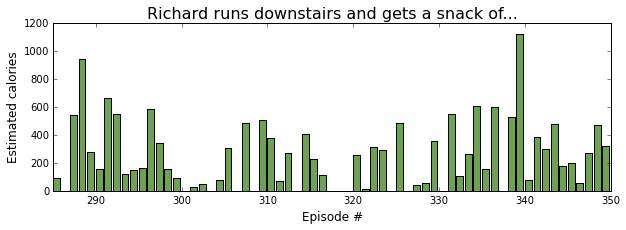

In [102]:
fig = plt.figure(figsize=(10,3))
bars = plt.bar(df['Ep ID'], df['Approximate calories'], color='#6da251')
plt.xlim(df['Ep ID'].min(), df['Ep ID'].max()+1)
plt.xlabel('Episode #', fontsize=12)
plt.ylabel('Estimated calories', fontsize=12)
plt.title('Richard runs downstairs and gets a snack of...', fontsize=16)
ax1 = plt.gca()
plt.savefig('richard.png',bbox_inches='tight')

plugins.clear(fig)
plugins.connect(fig, BarLabelToolTip(bars, df['Food'].tolist()))

In [103]:
output = mpld3.fig_to_html(fig)
f = open('richard.php', 'w')
f.write(output)
f.close()